In [1]:
import sys
import numpy as np
import pandas as pd 
import matplotlib as mpl
import sklearn

In [152]:
print('The Python version is {}'.format(sys.version))
print('The Numpy version is {}'.format(np.__version__))
print('The Pandas version is {}'.format(pd.__version__))
print('The Matplotlib version is {}'.format(mpl.__version__))
print('The Scikit-Learn version is {}'.format(sklearn.__version__))


The Python version is 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
The Numpy version is 1.18.5
The Pandas version is 1.0.5
The Matplotlib version is 3.2.2
The Scikit-Learn version is 0.23.1


### 1.6 Step 1. Load data and check its primitive info.

In [3]:
# pandas의 Dataframe의 데이터 읽기   
#  pandas class :   Series  =>  DataFrame
# indexes 스칼라개념?  #  Series 벡터개념  #  Dataframe 행렬개념
df = pd.read_excel('./default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


|속성 | 의미|
|:---:|:---|
|ID|User ID|
|SEX |Gender (1 = male; 2 = female|
|EDUCATION|Education (1 = graduate school; 2 =university; 3 = high school; 4 = others).|
|MARRIAGE |Marital status (1 = married; 2 = single; 3= others)|
|AGE|Age (year)|
|PAY_1–Pay_6 |A record of past payments. Past monthly payments, recorded from April to September, are stored in these columns. PAY_1 represents the repayment status in September, PAY_2 = repayment status in August. and so on. The measurement scale for the repayment status is as follows: -1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months.|
|BILL_AMT1–BILL_AMT6 |Bill statement amount (in NT dollar).BILL_AMT1 represents the bill statement amount in September; BILL_AMT2 represents the bill statement amount in August; and so on up to BILL_AMT7, which represents the bill statement amount in April.|
|PAY_AMT1–PAY_AMT6 |Amount of previous payment (NT dollar). PAY_AMT1 represents the amount paid in September; PAY_AMT2 represents the amount paid in August; and so on up to PAY_AMT6, which represents the amount paid in April.|
|default payment next month|1 = yes, 0 = no|



In [5]:
df.info() # df.info 가능
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 30000 entries, 0 to 29999
# Data columns (total 25 columns):
#  #   Column                      Non-Null Count  Dtype 
# ---  ------                      --------------  ----- 
#  0   ID                          30000 non-null  object
#  1   LIMIT_BAL                   30000 non-null  int64 
#  2   SEX                         30000 non-null  int64 
#  3   EDUCATION                   30000 non-null  int64 
#  4   MARRIAGE                    30000 non-null  int64 
#  5   AGE                         30000 non-null  int64 
#  6   PAY_1                       30000 non-null  object
#  7   PAY_2                       30000 non-null  int64 
#  8   PAY_3                       30000 non-null  int64 
#  9   PAY_4                       30000 non-null  int64 
#  10  PAY_5                       30000 non-null  int64 
#  11  PAY_6                       30000 non-null  int64 
#  12  BILL_AMT1                   30000 non-null  int64 
#  13  BILL_AMT2                   30000 non-null  int64 
#  14  BILL_AMT3                   30000 non-null  int64 
#  15  BILL_AMT4                   30000 non-null  int64 
#  16  BILL_AMT5                   30000 non-null  int64 
#  17  BILL_AMT6                   30000 non-null  int64 
#  18  PAY_AMT1                    30000 non-null  int64 
#  19  PAY_AMT2                    30000 non-null  int64 
#  20  PAY_AMT3                    30000 non-null  int64 
#  21  PAY_AMT4                    30000 non-null  int64 
#  22  PAY_AMT5                    30000 non-null  int64 
#  23  PAY_AMT6                    30000 non-null  int64 
#  24  default payment next month  30000 non-null  int64 
# dtypes: int64(23), object(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [6]:
df.describe() # 통계적 정보 제공

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,165760.989333,1.586500,1.833333,1.535900,35.108800,-0.132867,-0.164333,-0.219300,-0.263900,-0.288033,...,42791.362167,39884.398167,38480.350933,5613.321500,5.855410e+03,5174.387967,4776.089733,4754.749200,5164.223267,0.218733
std,130158.590432,0.513348,0.807699,0.542698,9.851592,1.191215,1.191096,1.162348,1.127519,1.144981,...,64090.316188,60606.644833,59406.836932,16539.094312,2.299256e+04,17565.538305,15532.893047,15239.070708,17712.664703,0.413394
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2034.000000,1534.000000,1080.000000,836.000000,7.217500e+02,371.000000,223.000000,170.750000,9.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18759.500000,17835.500000,16643.000000,2084.500000,2.000000e+03,1776.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53572.250000,49804.000000,48863.500000,5000.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
print( type (df.columns)) # <class 'pandas.core.indexes.base.Index'>  
print (df.columns)   # df.columns()  # error
# Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
#        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
#        'default payment next month'],
#       dtype='object')
print( df.columns.index)
# AttributeError: 'Index' object has no attribute 'index'

<class 'pandas.core.indexes.base.Index'>
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


AttributeError: 'Index' object has no attribute 'index'

In [8]:
# index는 RDB pk역할, 실제 data 영역에는 포함되어 있지는 않음
# pandas에서 index가 없으면 RangeIndex 부여함
# 사용자 정의 index : data중에서도 set_index(), reset_index()함수로 사용자 정의할 수 있음(RDB pk 만들기)

print(type(df.index)) # <class 'pandas.core.indexes.range.RangeIndex'>
df.index
# RangeIndex(start=0, stop=30000, step=1)

<class 'pandas.core.indexes.range.RangeIndex'>


RangeIndex(start=0, stop=30000, step=1)

In [9]:
print( type(df['ID'])) # <class 'pandas.core.series.Series'>
print( df['ID'].count())  #30000
print( df['ID'].head() )
# 0    798fc410-45c1
# 1    8a8c8f3b-8eb4
# 2    85698822-43f5
# 3    0737c11b-be42
# 4    3b7f77cc-dbc0
# Name: ID, dtype: object
print( df['ID'].index)
# RangeIndex(start=0, stop=30000, step=1)
# 데이터 영역에는 없으나, pk 역할위해 부여

<class 'pandas.core.series.Series'>
30000
0    798fc410-45c1
1    8a8c8f3b-8eb4
2    85698822-43f5
3    0737c11b-be42
4    3b7f77cc-dbc0
Name: ID, dtype: object
RangeIndex(start=0, stop=30000, step=1)


In [10]:
print( type(df['ID'].unique())) # unique() numpy 함수
# <class 'numpy.ndarray'>  # numpy기반으로 pandas wrapper되어 API만들었다 

# python 자료구조 (tuple,list,dict) 중에서  : list   
# numpy 자료구조 n차원의 배열객체          : ndarray  
# pandas 자료구조                          : Series       Dataframe
#                                         (1차원 ndarry)   (2차원ndarray)

# 자료구조의 상호변환 (# mlp-pandas.ipynb 참조)
# Dafaframe -> ndarray,       list,             dict 변환 중요
#            df.values  df.values.tolist()  df.to_dict()

df['ID'].unique()
# array(['798fc410-45c1', '8a8c8f3b-8eb4', '85698822-43f5', ...,
#        '95cdd3e7-4f24', '00d03f02-04cd', '15d69f9f-5ad3'], dtype=object)

<class 'numpy.ndarray'>


array(['798fc410-45c1', '8a8c8f3b-8eb4', '85698822-43f5', ...,
       '95cdd3e7-4f24', '00d03f02-04cd', '15d69f9f-5ad3'], dtype=object)

In [97]:
a = np.array(['a', 'b', 'b', 'c', 'a'])
index, count = np.unique(a, return_counts=True)
print(index) # ['a' 'b' 'c']
count   # array([2, 2, 1], dtype=int64)

['a' 'b' 'c']


array([2, 2, 1], dtype=int64)

In [11]:
print( type (df['ID'].nunique())) # <class 'int'>  # Series -> int (python)
df['ID'].nunique() # 29687

<class 'int'>


29687

In [12]:
# value_count() : Series의 value 값들은 index로 하는 RDB의 groupby 수행하는 것과 비슷,  count된 값이 value(element) 
# value_count() : unique()가 동시에 수행되어 중복이 제거되고 새로운 Series return

id_counts=df['ID'].value_counts()  
print(type(id_counts))             # <class 'pandas.core.series.Series'>
print(id_counts.count())           # 29687  # 29687 + 313 + 313 = 30000
print (id_counts.head())
# 5b8dce34-2ded    2
# db91a87c-3cbe    2
# d1808f44-48ce    2
# 693a0664-bde6    2
# b1c90397-5fb2    2
# Name: ID, dtype: int64

# print(id_counts.info()) 
# AttributeError: 'Series' object has no attribute 'info'

<class 'pandas.core.series.Series'>
29687
2618fdc4-e731    2
4f249cbc-5e9c    2
94d8b70f-361d    2
61ae560c-4479    2
8a6bbf3d-8a2d    2
Name: ID, dtype: int64


In [13]:
id_counts.index
# Index(['5b8dce34-2ded', 'db91a87c-3cbe', 'd1808f44-48ce', '693a0664-bde6',
#        'b1c90397-5fb2', 'c9826d63-f7d3', '7b6e060a-97a0', '02e41927-a6df',
#        'b44b81b2-7789', 'c3ddce11-35e2',
#        ...
#        'b79af2a4-31d9', '6cda0fb0-2ad7', '79976c44-313e', 'df3ea869-a138',
#        '0249bbd1-2993', '0eb1135a-ff63', 'e126d0eb-39b7', '822e5297-19ed',
#        'ce7bca28-6cf7', '15c0d28b-3065'],
#       dtype='object', length=29687)

Index(['2618fdc4-e731', '4f249cbc-5e9c', '94d8b70f-361d', '61ae560c-4479',
       '8a6bbf3d-8a2d', '01355f46-3f0b', '7b7cc3cd-0b76', '590a776e-5049',
       '42009c72-651f', '7574bf9e-f3f9',
       ...
       '78aa7d5e-413b', '8aece077-a023', '4da513f4-1f40', '844249fa-13af',
       'ae2f4e4a-df99', '5c82bfdf-ba70', '2417032c-b93c', '4a650f65-4581',
       '1b86070a-f48d', '5845fc07-8157'],
      dtype='object', length=29687)

In [14]:
# 데이터 영역의 값을 보는 명령어 values
id_counts.values
# array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [15]:
print(id_counts.count())  # 29687  # nparray에서는 nunique()

# value_count() : Series의 value 값들은 index로 하는 RDB의 groupby 수행하는 것과 비슷,  count된 값이 value(element) 
# value_count() : unique()가 동시에 수행되어 중복이 제거되고 새로운 Series return
id_counts.value_counts() # 29687 + 313 + 313 = 30000
# 1    29374
# 2      313
# Name: ID, dtype: int64

29687


1    29374
2      313
Name: ID, dtype: int64

### Boolean masks이용 filtering

In [16]:
# numpy에서의 
np.random.seed(seed=24)
random_integers = np.random.randint(1, 5, 100) # numpy 사용
print( type(random_integers) ) # <class 'numpy.ndarray'>
random_integers[:10]  # numpy의 ndarray slicing           # pd에서는 head()
# array([3, 4, 1, 4, 2, 2, 2, 1, 4, 4])

<class 'numpy.ndarray'>


array([3, 4, 1, 4, 2, 2, 2, 1, 4, 4])

In [105]:
# 비교연산자 Booleam masks  
is_equal_to_3 = random_integers == 3        # python, javascipt에서도 가능

print( type(is_equal_to_3)) # <class 'numpy.ndarray'>
print(is_equal_to_3[:5]) 
# [ True False False False False]

print( sum(is_equal_to_3))  # ndarray sum() 사용함에 유의          # ndarray count()없음, # df.count() 있음 # df.nunique() 있음
# 22  # True만 카운팅(1+1+1,,,,)하여 # random_integers == 3 인 갯수


<class 'numpy.ndarray'>
[ True False False False False]
22


In [18]:
# Boolean masks이용한 filtering

# 아래 두 코드는 값이 같다
print(random_integers[is_equal_to_3])   # Iterator 처리 filtering
# [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
random_integers[ random_integers == 3 ]
# array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

### 실제 data boolean 이용 filtering

In [20]:
# 2번 반복된 id들을 추출해 보자
id_counts=df['ID'].value_counts()  
# print(type(id_counts))              # <class 'pandas.core.series.Series'>
# print (id_counts)
# 96970f37-abaa    2
# 9db1809e-845a    2
# 3e60a98c-e520    2
# 6d1fc219-67b0    2
# b1c90397-5fb2    2
#                 ..
# d1695e9f-dc82    1
# 29deba2e-9cb6    1
# f26af336-4bda    1
# 6effcdc3-4afa    1
# 53108e36-741c    1
# Name: ID, Length: 29687, dtype: int64
    
dupe_mask = id_counts == 2
print( type (dupe_mask)) # <class 'pandas.core.series.Series'>
dupe_mask[0:5]           # index에 대한 boolean 값
# 5b8dce34-2ded    True
# db91a87c-3cbe    True
# d1808f44-48ce    True
# 693a0664-bde6    True
# b1c90397-5fb2    True
# Name: ID, dtype: bool

<class 'pandas.core.series.Series'>


2618fdc4-e731    True
4f249cbc-5e9c    True
94d8b70f-361d    True
61ae560c-4479    True
8a6bbf3d-8a2d    True
Name: ID, dtype: bool

In [21]:
# filtering
id_counts[id_counts == 2]
# 2618fdc4-e731    2
# 4f249cbc-5e9c    2
# 94d8b70f-361d    2
# 61ae560c-4479    2
# 8a6bbf3d-8a2d    2
#                 ..
# 6ff744d5-91f0    2
# 52bcd5ae-72d3    2
# db903e22-a55a    2
# af052d9b-f06b    2
# 310d5326-56c7    2
# Name: ID, Length: 313, dtype: int64

2618fdc4-e731    2
4f249cbc-5e9c    2
94d8b70f-361d    2
61ae560c-4479    2
8a6bbf3d-8a2d    2
                ..
6ff744d5-91f0    2
52bcd5ae-72d3    2
db903e22-a55a    2
af052d9b-f06b    2
310d5326-56c7    2
Name: ID, Length: 313, dtype: int64

In [22]:
# 데이터중 id가 중복된 id들을 알고 싶다 

# id_counts.index에 대해 boolean mask 적용한다
# 아래 2개의 코드는 결과 같다
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = id_counts.index[id_counts == 2]
print ( type (dupe_ids)) # <class 'pandas.core.indexes.base.Index'>

<class 'pandas.core.indexes.base.Index'>


In [23]:
# 자료구조의 변환 pandas index -> python list
dupe_ids = list(dupe_ids)
print (len(dupe_ids)) # 313
dupe_ids[:10]
# ['2618fdc4-e731',
#  '4f249cbc-5e9c',
#  '94d8b70f-361d',
#  '61ae560c-4479',
#  '8a6bbf3d-8a2d',
#  '01355f46-3f0b',
#  '7b7cc3cd-0b76',
#  '590a776e-5049',
#  '42009c72-651f',
#  '7574bf9e-f3f9']

313


['2618fdc4-e731',
 '4f249cbc-5e9c',
 '94d8b70f-361d',
 '61ae560c-4479',
 '8a6bbf3d-8a2d',
 '01355f46-3f0b',
 '7b7cc3cd-0b76',
 '590a776e-5049',
 '42009c72-651f',
 '7574bf9e-f3f9']

### markdown이용하여 표 만들기
* | | 사이에 공백이라도 주어야 한다

테이블 정렬: 헤더와 row 구분 자에 적용  
오른쪽 정렬  —-:  
왼쪽 정렬   :—-  
간운데 정렬  :—-:          

In [ ]:
|  | A | B | 
| :---:|:---: |:---:
| 0 | 1 | a | 
| 1 | 2| b|
| 2 | 3| c|

##
* pandas의 index slicing :  명칭(index, column)기반 == 라벨값기반 loc() ==> 화면에 보이는 index
                       위치기반 == 정수기반 iloc()
* matrix boolean mask 함수 : isin()

In [93]:
df1 = pd.DataFrame({'A':[1, 2, 3], 'B':['a', 'b', 'C']})
df1

,A,B
0,1,a
1,2,b
2,3,C


In [25]:
df1.isin([1, 3, 12, 'a'])

,A,B
0,True,True
1,False,False
2,True,False


In [26]:
# filtering
df1.loc[df1['A'].isin([1, 3, 12,'a'])]

,A,B
0,1,a
2,3,C


#### 명칭기반 loc()

In [27]:
df = pd.DataFrame(np.arange(10, 22).reshape(3, 4),
index=["a", "b", "c"],
columns=["A", "B", "C", "D"])
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


In [28]:
df.loc["b":"c"] # 명칭기반 slicing   #  위치기반(정수기반) slicing은 pytyon slicing와 동일  

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [29]:
df["b":"c"]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [30]:
df.loc[["b", "c"]]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [31]:
#df[["b", "c"]]
#KeyError: "None of [Index(['b', 'c'], dtype='object')] are in the [columns]"

In [32]:
df.loc["a", "A"]

10

In [33]:
df.loc["b":, "A"]

b    14
c    18
Name: A, dtype: int32

In [34]:
df.loc[:, "A"]

a    10
b    14
c    18
Name: A, dtype: int32

In [35]:
df.loc[["a", "b"], ["B", "D"]]

,B,D
a,11,13
b,15,17


In [36]:
df2 = pd.DataFrame(np.arange(10, 26).reshape(4, 4), columns=["A", "B", "C", "D"])
df2

,A,B,C,D
0,10,11,12,13
1,14,15,16,17
2,18,19,20,21
3,22,23,24,25


In [37]:
df2.loc[1:2]

,A,B,C,D
1,14,15,16,17
2,18,19,20,21


In [99]:
df = pd.DataFrame(np.arange(10, 22).reshape(3, 4),
index=["a", "b", "c"],
columns=["A", "B", "C", "D"])
df.loc["a", "A"]

10

In [100]:
print(df.loc[df.A > 10, ["C", "D"]])
df.loc[df['A'] > 10, ["C", "D"]]

    C   D
b  16  17
c  20  21


,C,D
b,16,17
c,20,21


#### 위치기반 ioc() : 정수 index

In [40]:
df = pd.DataFrame(np.arange(10, 22).reshape(3, 4),
index=["a", "b", "c"],
columns=["A", "B", "C", "D"])
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


In [41]:
df.iloc[:2, 2] # python의 슬라이싱 개념과 동일하다 [x:y] x 부터 y-1까지 

a    12
b    16
Name: C, dtype: int32

In [43]:
df.iloc[0, -2:] # python의 슬라이싱과 동일하다 [-x:]  제일뒤부터 x까지 # index가 필요하므로 pandas에서 column명이 index가 된다

C    12
D    13
Name: a, dtype: int32

In [44]:
df.iloc[2:3, 1:3]

,B,C
c,38,40


In [45]:
df.iloc[1] # row만 indexing한다. # Series와 Dafaframe index 필요하므로 column명이 index 된다
# A    14
# B    15
# C    16
# D    17
# Name: b, dtype: int32

A    14
B    15
C    16
D    17
Name: b, dtype: int32

In [47]:
df.iloc[-1] # row 제일 뒤에서 1번째 # index가 필요하므로 pandas에서 column명이 index가 된다
# A    36
# B    38
# C    40
# D    42
# Name: c, dtype: int32

A    36
B    38
C    40
D    42
Name: c, dtype: int32

In [42]:
# 대입연산자 활용 값 치환
df.iloc[-1] = df.iloc[-1] * 2
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,36,38,40,42


### at, iat 메소드
* at, iat 인덱서는 loc, iloc 인덱서와 비슷하지만 하나의 스칼라 값을 뽑을 때만 사용한다.
* 빠른 인덱싱 속도가 요구되는 경우에 사용한다.

In [48]:
%timeit df.loc["a", "A"]
# 5.26 µs ± 73.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

5.26 µs ± 73.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [49]:
%timeit df.at["a", "A"]
# 3.23 µs ± 84.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

3.23 µs ± 84.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [50]:
%timeit df.iloc[0, 0]
# 5.43 µs ± 43.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

5.43 µs ± 43.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [51]:
%timeit df.iat[0, 0]
# 4.62 µs ± 659 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

4.62 µs ± 659 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### 데이터 적용

In [52]:
dupe_ids[0:3] # 313개 중에서 속성값이 어떤지를 확인하기 위해서 3개 행만 찍어봄

['2618fdc4-e731', '4f249cbc-5e9c', '94d8b70f-361d']

In [106]:
df = pd.read_excel('./default_of_credit_card_clients__courseware_version_1_21_19.xls')
df.loc[df['ID'].isin(dupe_ids[0:3])]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
13807,2618fdc4-e731,50000,2,2,2,26,Not available,0,2,2,...,46730,27204,9662,3189,1500,101,1590,0,194,0
13907,2618fdc4-e731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18824,4f249cbc-5e9c,90000,2,1,2,27,0,0,0,0,...,60210,61221,62636,3200,3500,3000,2600,2600,3000,0
18924,4f249cbc-5e9c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23681,94d8b70f-361d,400000,2,2,1,46,0,0,0,0,...,39907,35061,35969,15000,15000,10000,15000,20000,20000,0
23781,94d8b70f-361d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


중복된 ID들의 일부(3개)를 확인해 본 결과 하나가 모든 속성값들이 0으로 되어 있음을 확인
했다. 그러면 나머지 310개도 모두 이런 경우인가 만약 그렇다면 속성값이 모두 0인 행들을
제거하면 될 것이다. 확인해 보자!  
마크다운 줄바꿈은 공백 2번으로 

In [108]:
print(df.shape) # (30000, 25)
df.loc[df['ID'].isin(dupe_ids)].shape # (626, 25)  # 313 X 2

(30000, 25)


(626, 25)

In [125]:
# boolean mask 
df_zero_mask = df == 0 # df_zero_mask 는 어떤 모양일까 ? 이젠 df_zero_mask를 굳이 출력해 보지 않아도 상상할 수 있어야 함
print(df_zero_mask.head(2))
print(df_zero_mask.shape) # (30000, 25)
#  전체 True가 된 것을 확인해 보자
df_zero_mask.loc[13907] # iloc[13907]도 여기서는 동일함 index 0부터 시작하므로
    # ID                            False
    # LIMIT_BAL                      True
    # SEX                            True
    # EDUCATION                      True
    # MARRIAGE                       True
    # AGE                            True
    # PAY_1                          True
    # PAY_2                          True
    # PAY_3                          True
    # PAY_4                          True
    # PAY_5                          True
    # PAY_6                          True
    # BILL_AMT1                      True
    # BILL_AMT2                      True
    # BILL_AMT3                      True
    # BILL_AMT4                      True
    # BILL_AMT5                      True
    # BILL_AMT6                      True
    # PAY_AMT1                       True
    # PAY_AMT2                       True
    # PAY_AMT3                       True
    # PAY_AMT4                       True
    # PAY_AMT5                       True
    # PAY_AMT6                       True
    # default payment next month     True
    # Name: 13907, dtype: bool

      ID  LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  PAY_1  PAY_2  PAY_3  \
0  False      False  False      False     False  False  False  False  False   
1  False      False  False      False     False  False  False  False   True   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  False  ...       True       True       True      True     False      True   
1   True  ...      False      False      False      True     False     False   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0      True      True      True                       False  
1     False      True     False                       False  

[2 rows x 25 columns]
(30000, 25)


ID                            False
LIMIT_BAL                      True
SEX                            True
EDUCATION                      True
MARRIAGE                       True
AGE                            True
PAY_1                          True
PAY_2                          True
PAY_3                          True
PAY_4                          True
PAY_5                          True
PAY_6                          True
BILL_AMT1                      True
BILL_AMT2                      True
BILL_AMT3                      True
BILL_AMT4                      True
BILL_AMT5                      True
BILL_AMT6                      True
PAY_AMT1                       True
PAY_AMT2                       True
PAY_AMT3                       True
PAY_AMT4                       True
PAY_AMT5                       True
PAY_AMT6                       True
default payment next month     True
Name: 13907, dtype: bool

iloc[:, 1:] : 정수 색인 메소드 iloc(모든 행, 열은 맨 좌측, 즉 ID빼고 모든 열)들 중에서 모든
열(axis=1)의 값이 True인 경우만 True를 리턴함(all() 메소드).

In [128]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)   # all (전체 true만 boolean 반환)
print(df_zero_mask.shape) # (30000, 25)
print(feature_zero_mask.shape) # (30000,)
print(type(feature_zero_mask))    # <class 'pandas.core.series.Series'>
print( feature_zero_mask.head() ) 
    # 0    False
    # 1    False
    # 2    False
    # 3    False
    # 4    False
    # dtype: bool
print(feature_zero_mask[[13907, 18924, 23781]]) # True True True
sum(feature_zero_mask) # 315 true = 1 이므로 1 + 1 + ,, # 313 중복 id # 중복되지 않은 2개의 row도 0으로 채워져 있었음을 알 수 있다

(30000, 25)
(30000,)
<class 'pandas.core.series.Series'>
0    False
1    False
2    False
3    False
4    False
dtype: bool
13907    True
18924    True
23781    True
dtype: bool


315

It looks like there are at least as many “zero rows” as there are duplicate IDs. Let’s
remove all the rows with all > zero features and response, and see if that gets rid of the
duplicate IDs.

In [ ]:
## 얇은 복사, 깊은 복사
# copy() 외부객체만 복사 내부객체는 동일한 주소 바라봄, deepcopy() 내부객체까지도 주소변경
# https://wikidocs.net/16038

In [129]:
# df에서 315개(0값) 제외하기 위해 전체 30000 row에 대해 
# feature_zero_mask값(True all 0값, False)에 대하여 ~ not 처리하여 적용하면 됨

df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [130]:
df_clean_1.shape # (29685, 25) # 30000 - 315

(29685, 25)

In [131]:
df_clean_1['ID'].nunique() # 29685

29685

### 1.8 Step 3. Exploring and cleaning the data

In [133]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

int64 데이터타입이 23개 속성  
object 데이터타입이 2개 속성  
(ID는 숫자, 문자, 특수문자가 있음 OK!, 근데 PAY_1 속성은 왜 object 데이터타입인가 ?)  
PAY_1 속성을 확인해 볼 필요가 생김

In [135]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [136]:
df_clean_1['PAY_1'].value_counts()
# 0                13087
# -1                5047
# 1                 3261
# Not available     3021
# -2                2476
# 2                 2378
# 3                  292
# 4                   63
# 5                   23
# 8                   17
# 6                   11
# 7                    9
# Name: PAY_1, dtype: int64

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [139]:
# PAY_1 속성값 중에서 Not available 로 인해 object 데이터타입으로 인식. 제거가 필요힘.
# 데이터는 무조건 number형이 되어야 됨, int, float 
# boolean masks
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
print(valid_pay_1_mask[0:5])
sum(valid_pay_1_mask) # 26664  # 29685 - 3021

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool


26664

In [142]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
print ( df_clean_2.shape ) # (26664, 25)
df_clean_2['PAY_1'].value_counts()

(26664, 25)


 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [144]:
# datatype 변경
# python 형변환 int(), float(), str(), list(), dict(), tuple()   # datatype  확인은 type()
# ndarray 형변환  astype(np.Type)                               # datatype  확인은 .dtype
# pandas  형변환  df['column'].astype('int')                     # datatype  확인은 df.dtypes or df enter
#                 pd.to_numeric(df['column'])
# 2개 column 형변환 df2[['col_str_1', 'col_str_2']].apply(pd.to_numeric)
# 모든 column 형변환 df.apply(pd.to_numeric)
# 문자열을 숫자형으로 변환 시 ValueError 를 무시하기: df.apply(pd.to_numeric, errors = 'coerce') 
# pandas  형변환 https://rfriend.tistory.com/470 참조

# 자료구조의 변환은 함수 체인으로   df -> Series  df.values ,   df -> Series -> list  df.values.to_list()

# object타입을 숫자타입으로 (데이터형은 무조건 number형)
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


1.9 Step 4. Exploring the credit limit and demographic features

In [145]:
import matplotlib.pyplot as plt #import plotting package
#render plotting automatically
%matplotlib inline
import matplotlib as mpl #additional plotting functionality
mpl.rcParams['figure.dpi'] = 100 #resolution setting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE3EF3FC70>,
      dtype=object)

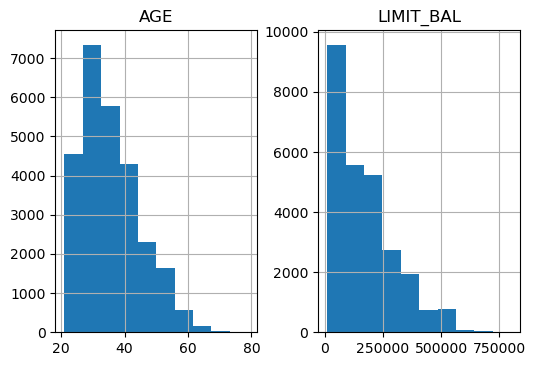

In [146]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [147]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe() 

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [148]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

“Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)”  
How to process the undocumented education levels 0, 5, and 6 ? –> Assign unknown categories to other.

In [149]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)

In [150]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [151]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

“Marriage(1 = married; 2 = single; 3= others)”. There is a undocumented value, 0. So
we’ll lump it in with “others”.

In [153]:
#Should only be (1 = married; 2 = single; 3 = others).
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [154]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

1.10 Step 5. Exploring the categorical features

In [156]:
from scipy import stats
import numpy as np

In [157]:
X = np.array(range(1,11))
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [159]:
np.random.seed(seed=24)
Y = 2*X + np.random.normal(0, 1, 10) # 평균 = 0, 표준편차 = 1 인 10개 값  
Y
# normal(mean, sigma, size) 연속 정규분포 
# uniform(low, high, size)  이산 균일분포 
# binomial(n, p, size)      이산 이항분포 (베르누이)

# rand(row, column)    0~1 사이의 균일분포 실수 matrix array 생성
# randn(row, column)   가우시안분포 표준정규분포 실수 matrix array 생성
# randint(low, high, size(row, column))  균일분포의 정수 matrix array

array([ 3.32921217,  3.22996655,  5.68371964,  7.00918961,  8.92918374,
       10.56128672, 14.56441685, 16.29572189, 16.37359577, 20.2195652 ])

In [161]:
slope_line, intercept_line, r_value, p_value, std_err = stats.linregress(X,Y)
#LinregressResult(slope=기울기, intecept=Y절편, rvalue=상관계수, pvalue=p값,stderr=표준편차)
print(slope_line, intercept_line, r_value, p_value, std_err)

1.9477356223771833 -0.09296010872388116 0.9873288106292288 1.1107813199366336e-07 0.11067939045421993


([<matplotlib.axis.YTick at 0x1de3e9f4d60>,
 <a list of 5 Text major ticklabel objects>)

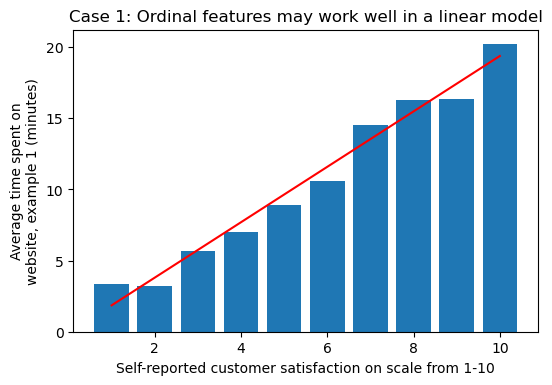

In [163]:
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['font.size'] = 10
plt.plot(X, slope_line*X + intercept_line, 'r-') # 선형회귀분석 결과 얻어진 1차 회귀식("기울기*X + Y절편")을 그려줌, 빨간색(r) 직선(-)
plt.bar(X,Y, align='center')
plt.xlabel('Self-reported customer satisfaction on scale from 1-10')
plt.ylabel('Average time spent on\nwebsite, example 1 (minutes)')
plt.title('Case 1: Ordinal features may work well in a linear model')
plt.yticks(range(0,25,5)) # Y값을 보고

In [164]:
np.random.seed(seed=20)
noise = np.random.normal(0, 1, 10)
Y_poly = -1*(X-2)*(X-9) + 10 + noise

In [166]:
slope_poly, intercept_poly, r_value, p_value, std_err = stats.linregress(X,Y_poly)

Text(0.5, 1.0, 'Case 2: Ordinal features may not work well in a linear model')

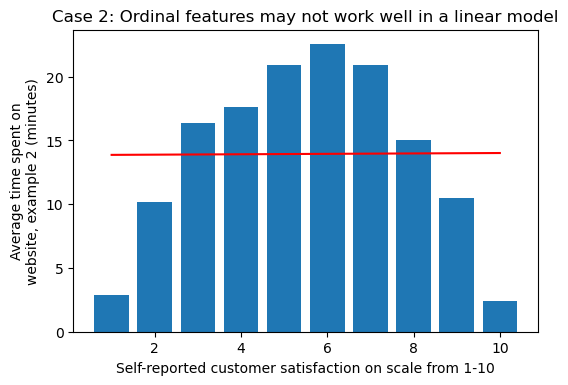

In [167]:
plt.plot(X, slope_poly*X + intercept_poly, 'r-')
plt.bar(X,Y_poly,align='center')
plt.xlabel('Self-reported customer satisfaction on scale from 1-10')
plt.ylabel('Average time spent on\nwebsite, example 2 (minutes)')
plt.title('Case 2: Ordinal features may not work well in a linear model')

In [169]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}) # default 칼럼에 mean 함수 적용

,default payment next month
EDUCATION,
1,0.193901
2,0.235913
3,0.255479
4,0.074879


Text(0.5, 0, 'Education level: ordinal encoding')

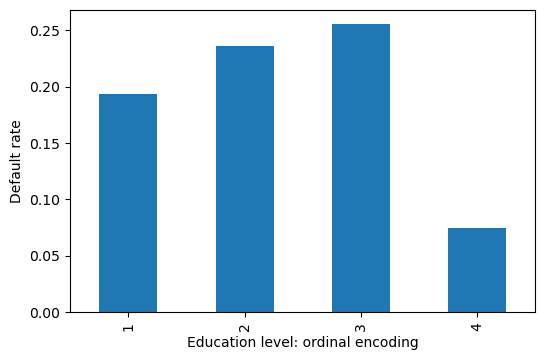

In [170]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

Step 6: Implementing other encoding model (One-Hot Encoding) for a categorical feature

In [171]:
df_clean_2['EDUCATION'].head()

0    2
1    2
2    2
3    2
4    2
Name: EDUCATION, dtype: int64

In [172]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [174]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


“Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)”

In [176]:
cat_mapping = {
1: "graduate school",
2: "university",
3: "high school",
4: "others"
}
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [177]:
# one-hot encoding  # pd.get_demmies()
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT']) # 범주형 특징 변수(컬럼)을␣ one-hot encoding으로 만들어줌
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [178]:
type (edu_ohe)

pandas.core.frame.DataFrame

In [179]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1) # 두개의 DataFrame을␣column 축(axis=1)으로 병합
df_with_ohe[['EDUCATION_CAT', 'graduate school','high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


1.12 Step 7: Exploring the Financial History Features in the Dataset

In [181]:
# 
df = pd.read_csv('./Data/Chapter_1_cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1


In [182]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'none', 'others', 'university'],
      dtype='object')

In [183]:
df.shape

(26664, 31)

In [184]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [185]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [186]:
df[pay_feats[0]].value_counts().sort_index() 
# value_counts()   value값을 index, value값의 count를 value로 하는 새로운 Series 생성
# sort_index() index기준으로 정렬, sort_values(by=['column', 'column'], ascending=?) 값으로 정렬

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

The values of -2, -1, 0 respond to an account that was in good standing last month: not
used, paid in full, and made > at least the minimum payment
1 = payment delay for one month, 2 = payment delay for two months, and so on  
잘 사용하지 않는 신용카드 0 이 많다는 것을 알 수 있다

PAY_1


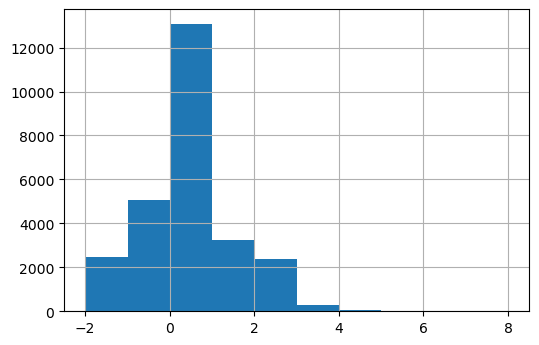

In [191]:
print (pay_feats[0]) # 'PAY_1'
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['font.size'] = 10
#df[pay_feats[0]].hist()
df[pay_feats[0]].hist()

In [192]:
# bin이(연체개월수) 중심이 안맞다
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

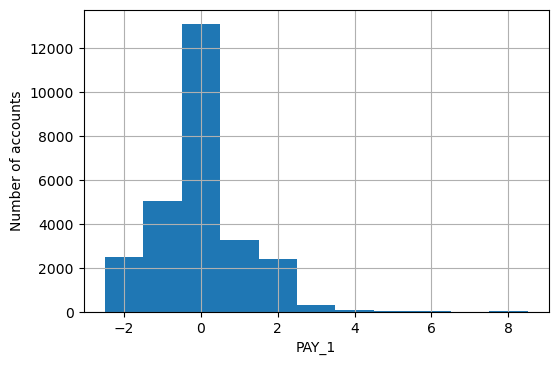

In [193]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

In [195]:
for feat in pay_feats:
    print(df[feat].value_counts().sort_index())

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64
-2     3375
-1     5368
 0    13961
 1       24
 2     3509
 3      289
 4       85
 5       24
 6       11
 7       17
 8        1
Name: PAY_2, dtype: int64
-2     3654
-1     5290
 0    13968
 1        3
 2     3400
 3      214
 4       69
 5       20
 6       19
 7       24
 8        3
Name: PAY_3, dtype: int64
-2     3893
-1     5070
 0    14596
 1        2
 2     2798
 3      161
 4       57
 5       30
 6        4
 7       51
 8        2
Name: PAY_4, dtype: int64
-2     4056
-1     4949
 0    15032
 2     2335
 3      151
 4       71
 5       14
 6        2
 7       53
 8        1
Name: PAY_5, dtype: int64
-2     4366
-1     5138
 0    14416
 2     2476
 3      156
 4       43
 5       10
 6       15
 7       42
 8        2
Name: PAY_6, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE08859AC0>,
      dtype=object)

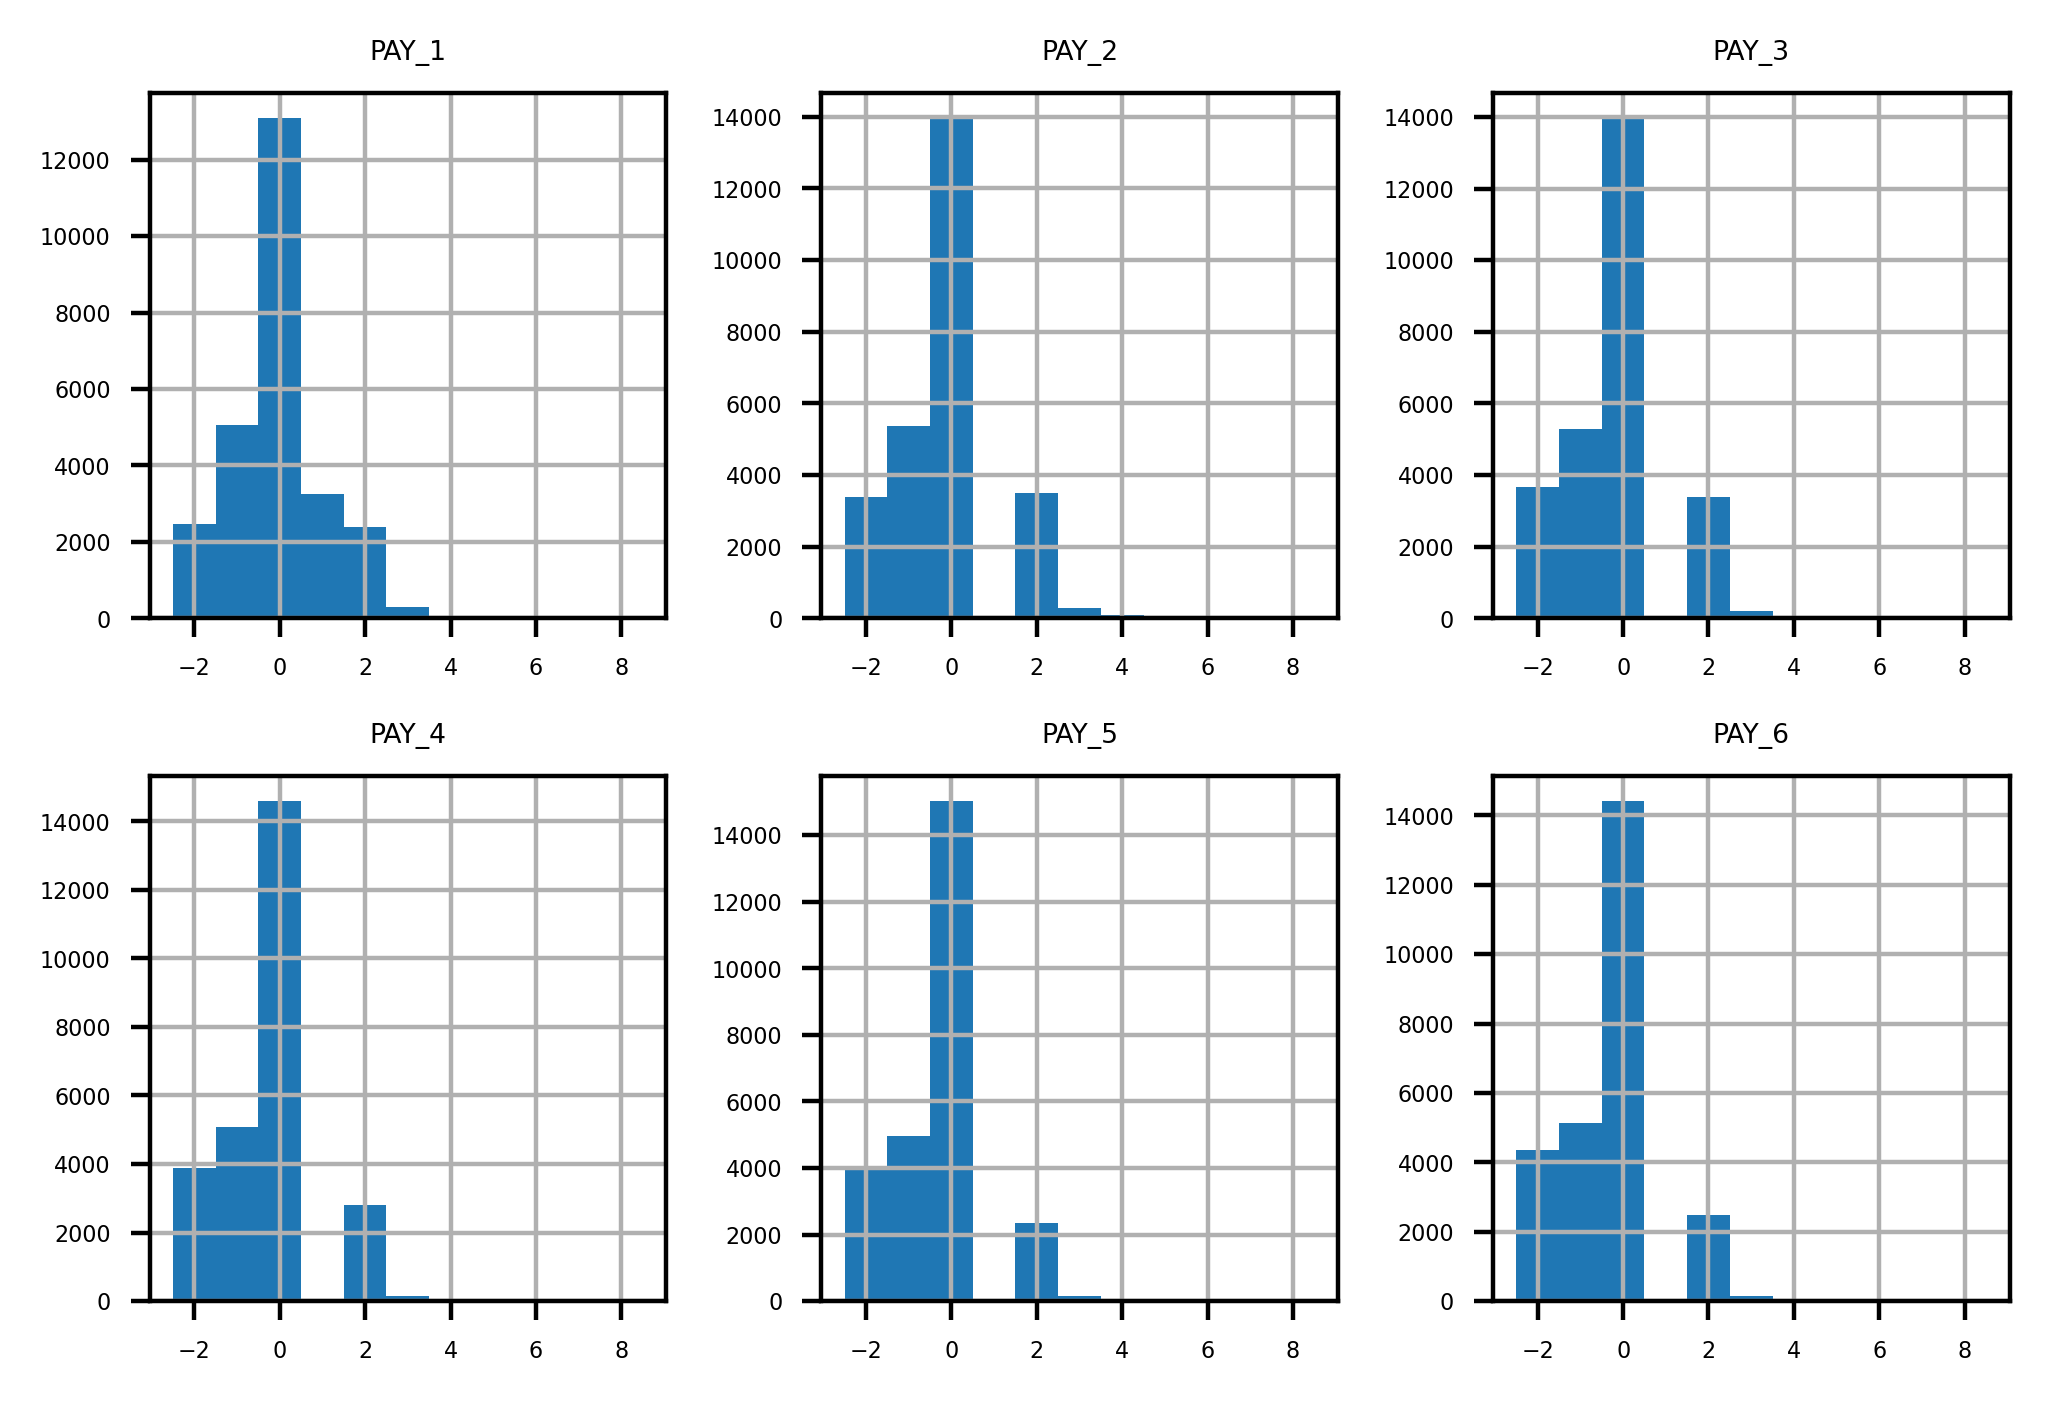

In [217]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3)) # ndarray  # bins X축

6개의 그래프를 자세히 검토해 보면 뭔가 이상하지 않은가 ?  
7월(PAY_3)과 8월(PAY_2)의 연체 개월수를 자세히 검토해보자. PAY_3 히스토그램을 보면  
7월에는 1개월 연체한 계좌가 거의 없는 것으로 보인다. 그런데 PAY_2 히스토그램은 보면  
8월에 2개월 연체가 계좌들이 꽤 발생한 것을 볼 수 있다. 갑자기 2개월을 연체가 계좌가 나  
타날 수 있는가 ? 1개월을 연체해야 2개월도 연체할 수 있는 것이지. 어떻게 바로 2개월 연체  
계좌가 나올 수 있단 말인가? 좀 더 자세히 비교하기 위하여 PAY_2와 PAY_3의 값들만을 좀  
뽑아서 직접 수치로 확인 볼 필요가 있다.

In [227]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head() # PAY_2(8월)의 값이 2인 row를 찾아서␣ PAY_2의 값과 PAY_3(7월)의 값을 5개

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


PAY_3의 값이 0 (연체가 없음)인데 PAY_2의 값이 갑자기 2가 되는 계좌들이 존재(index 1
번과 15번)함을 볼 수 있다.
이런 상황에 대면한다면 당신은 어떻게 할 것인가 ? * 만약 당신이 어떤 원천데이터로부터 이
데이터를 추출해 왔다면 추출하는데 사용된 질의 등에 문제가 없없는지 확인한다. * 그렇지
않고 client로부터 직접 데이터를 받았다면 이런 문제에 대해서 client에게 즉시 문의를 해야
한다.
• Client에게 확인해 볼 결과 데이터를 끌고 올 때 문제가 있었음을 확인 받았고 정확한
데이터를 다시 추출해 올 수 있다면 다시 받아 분석 작업을 수행한다.
• 우리 예제에서는 Client로부터 PAY_1만 정확한 데이터라는 사실을 확인 받았고 다른
데이터들을 다시 제공받을 수 없는 상황이라고 가정하자.
• 결국 PAY_1만이 유효한 데이터이며 채무불이행 여부를 판단하는 모델을 개발할 때
PAY_1만을 고려해야 한다. (Garbage 데이터는 과감하게 버려야 한다.)
This episode shows the importance of a thorough examination of data quality. Ultimately it is our responsibility to build a credible model, so we need to be sure we
believe the data is correct, by making this kind of careful examination. We explain
to the client that we can’t use the older features since they are not representative of the
future data the model will be scored on (that is, make predictions on future months),
and politely ask them to let us know of any further data issues they are aware of.


1.13 Activity 1: Exploring remaining financial features in the dataset

In [229]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE17D488E0>,
      dtype=object)

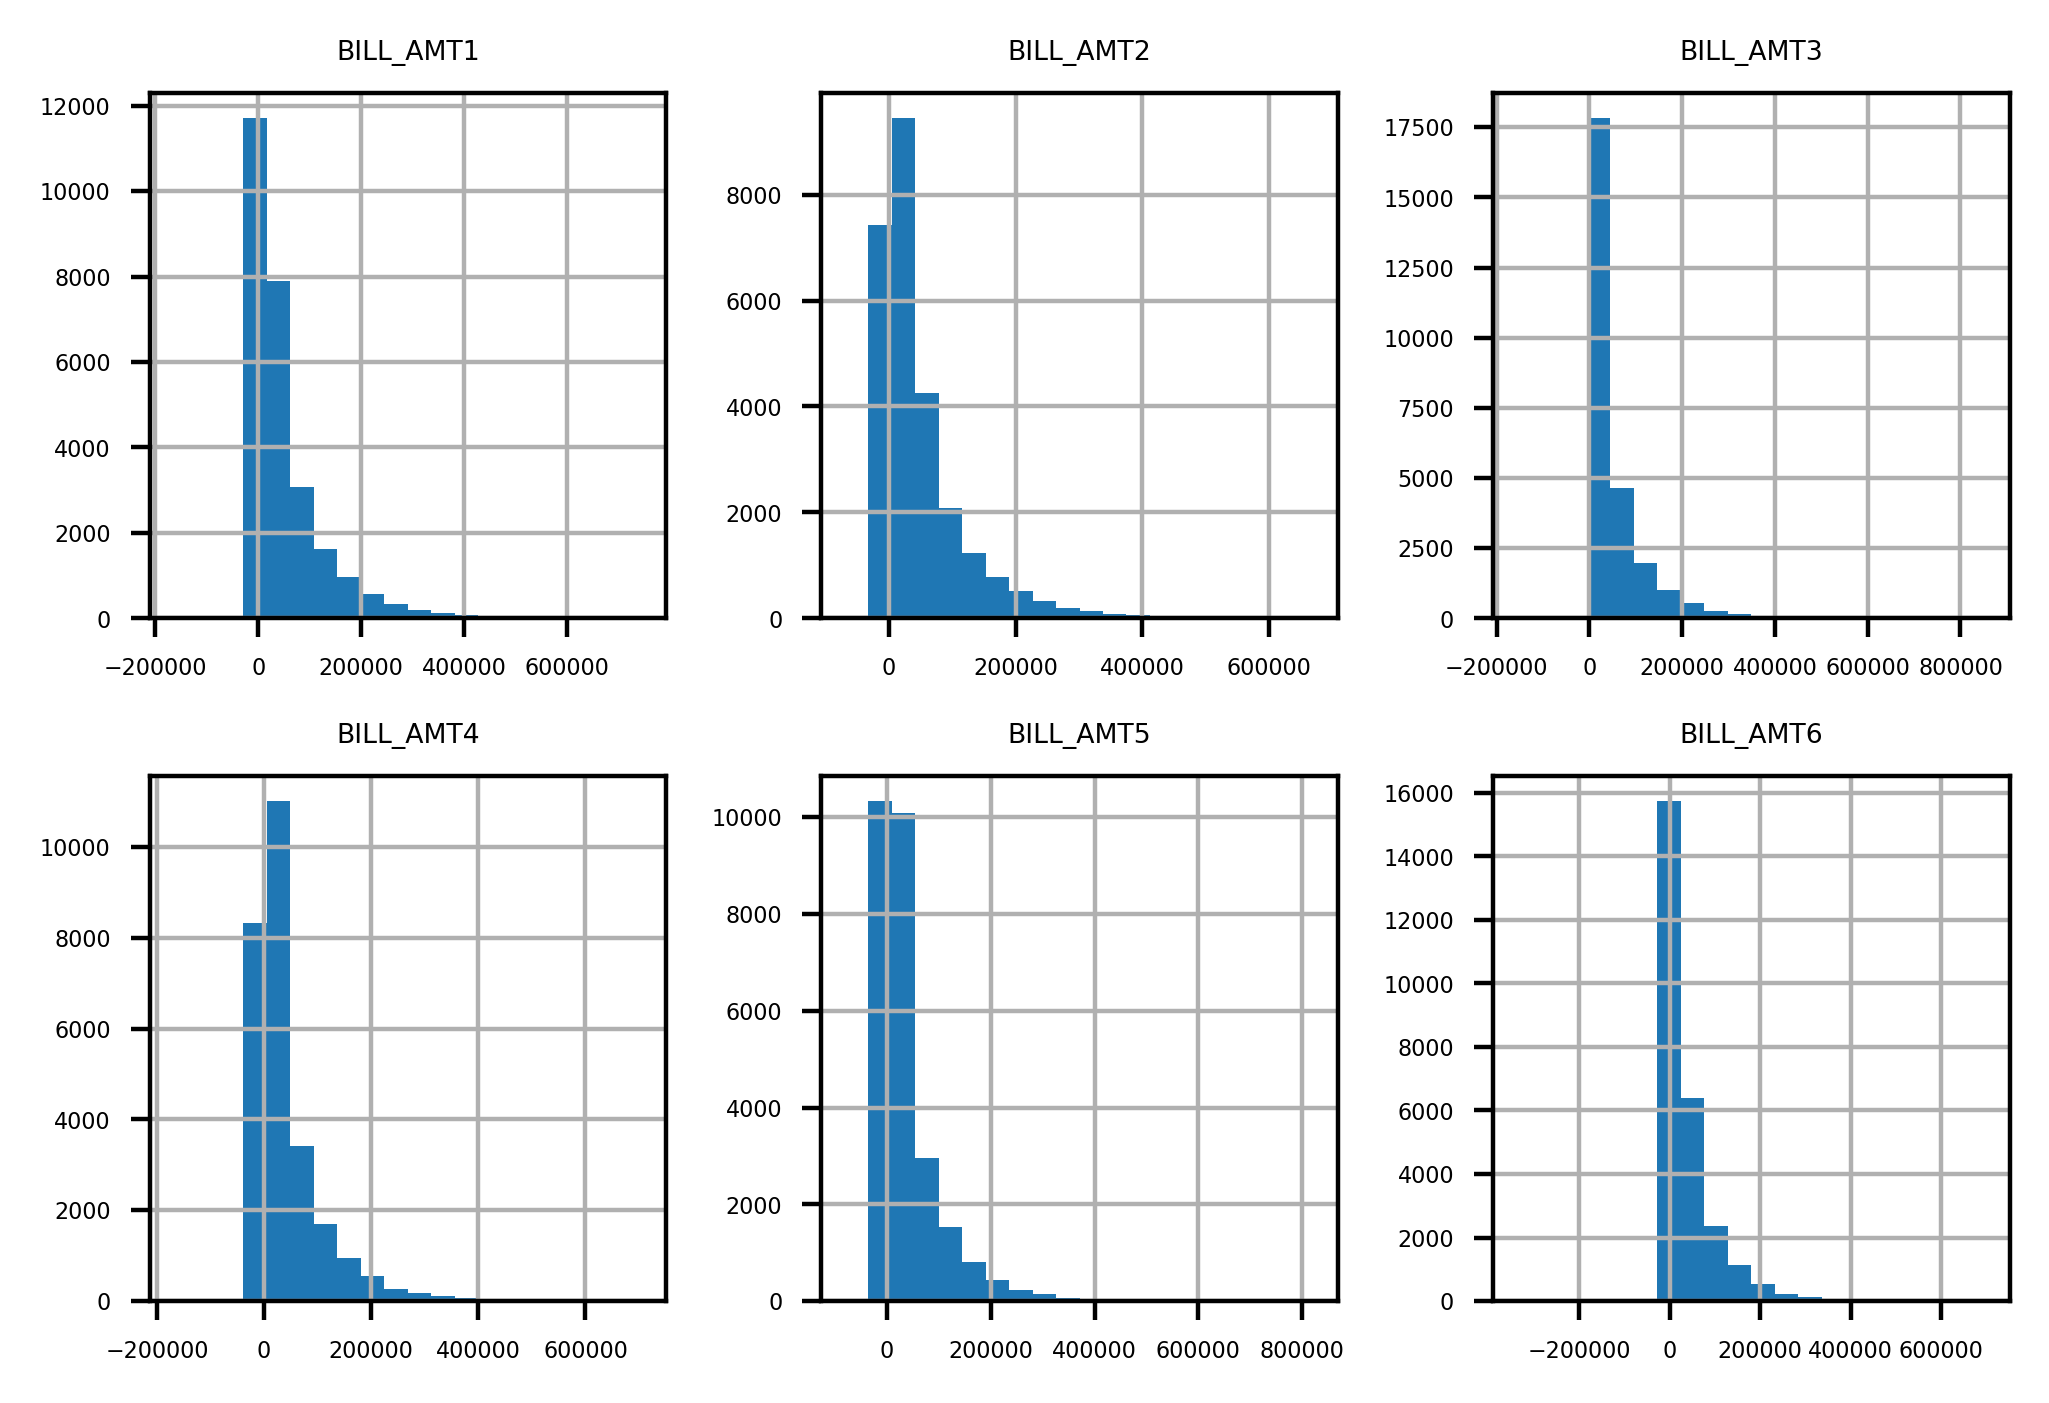

In [233]:
df[bill_feats].hist(bins=20, layout=(2,3)) # bins 10이면 막대그래프 5ea, # bin 20이면 막대그래프 10ea

In [234]:
# 지불내역
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE2256B430>,
      dtype=object)

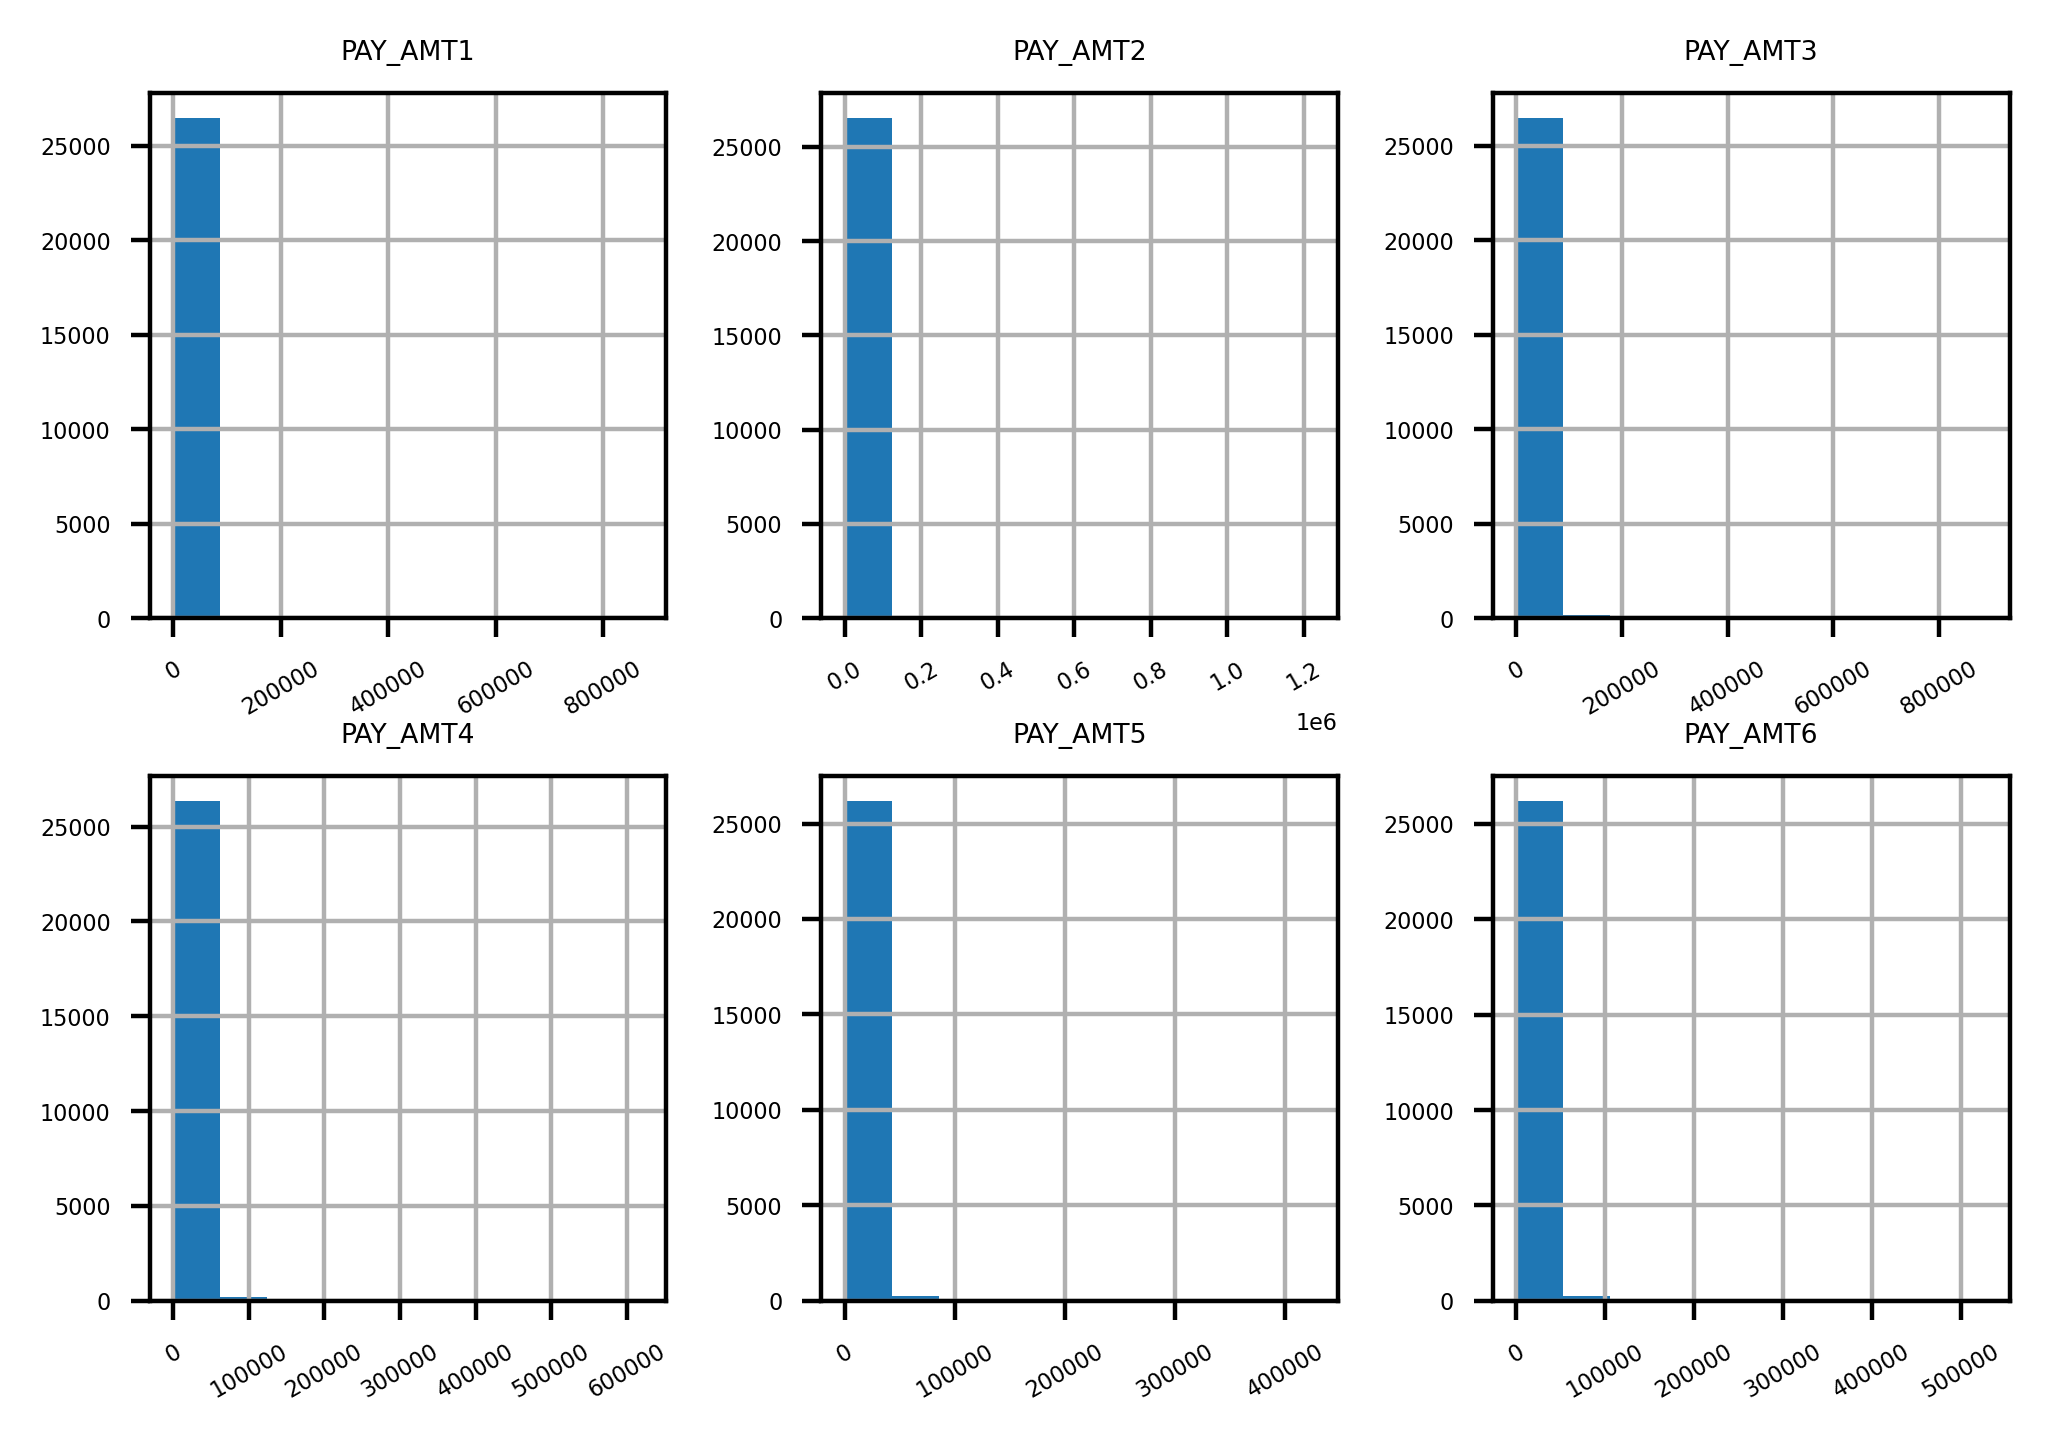

In [248]:
df[pay_amt_feats].hist(layout=(2,3), xrot=30) # xrot x축 값 대각선으로 표시되도록 

In [251]:
pay_zero_mask = df[pay_amt_feats] == 0
pay_zero_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [252]:
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE28400A30>,
      dtype=object)

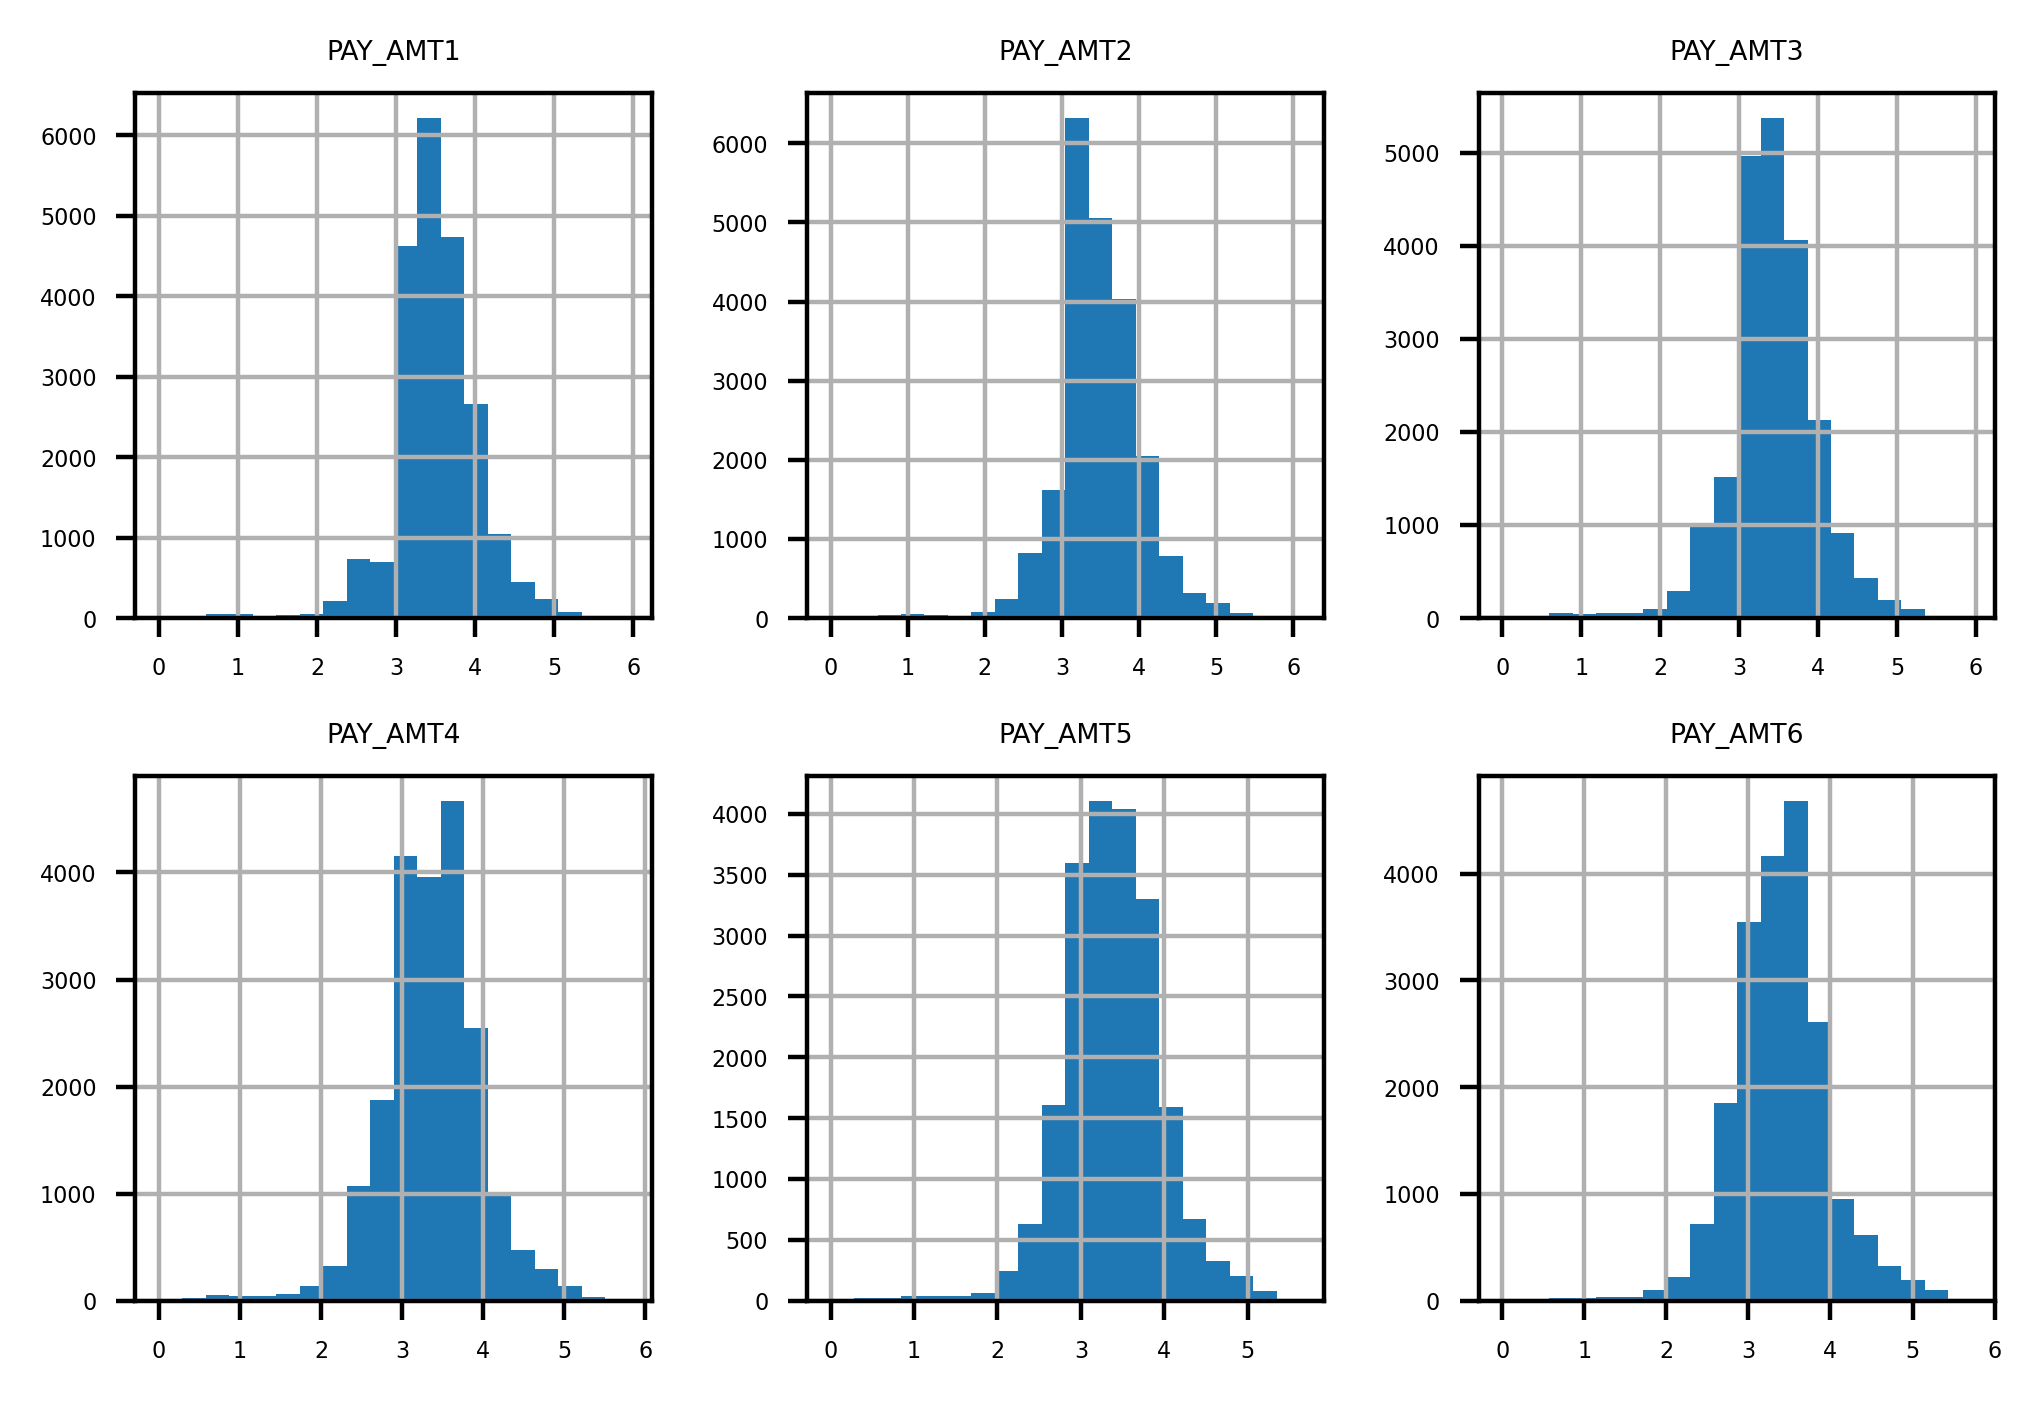

In [256]:
# 0값을 제외하고
# 단위가 너무 크게에 단위변환 apply(np.log10) 로그를 취함 # cf) Z 변환도 있음(표준정규분포)  # apply는 pandas 람다함수
# 복수개의 histogram
df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(bins=20, layout=(2,3))
                                                 # bins default 10 # bins대신 x값으로 'column'이나 사용자값 가능